## GAN Keras on a sin(bx+c) curve

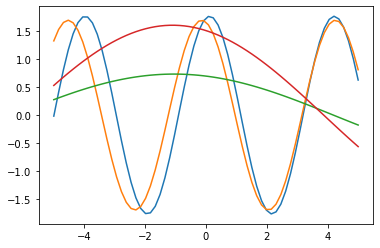

In [3]:
import matplotlib.pyplot as plt
import numpy as np
from numpy.random import randint, uniform
 
X_MIN = -5.0
X_MAX = 5.0
SAMPLE_SIZE = 10
X_COORDS = np.linspace(X_MIN , X_MAX, SAMPLE_LEN)
fig, axis = plt.subplots(1, 1)
for i in range(4):
    axis.plot(X_COORDS, uniform(0.1,2.0)*np.sin(uniform(0.2,2.0)*X_COORDS + uniform(2)))

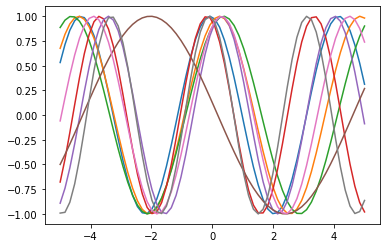

In [2]:
import numpy as np
from numpy.random import uniform
 
import matplotlib.pyplot as plt
 
SAMPLE_LEN = 64       # number N of points where a curve is sampled
SAMPLE_SIZE = 32768   # number of curves in the training set
X_MIN = -5.0          # least ordinate where to sample
X_MAX = 5.0           # last ordinate where to sample
 
# The set of coordinates over which curves are sampled
X_COORDS = np.linspace(X_MIN , X_MAX, SAMPLE_LEN)
 
# The training set
SAMPLE = np.zeros((SAMPLE_SIZE, SAMPLE_LEN))
for i in range(0, SAMPLE_SIZE):
    b = uniform(0.5, 2.0)
    c = uniform(np.math.pi)
    SAMPLE[i] = np.array([np.sin(b*x + c) for x in X_COORDS])


# We plot the first 8 curves
fig, axis = plt.subplots(1, 1)
for i in range(8):
    axis.plot(X_COORDS, SAMPLE[i])

### building discriminator

In [4]:
from keras.models import Sequential
from keras.layers import Dense, Dropout, LeakyReLU
 
DROPOUT = Dropout(0.4)        # Empirical hyperparameter
discriminator = Sequential()
discriminator.add(Dense(SAMPLE_LEN, activation="relu"))
discriminator.add(DROPOUT)
discriminator.add(Dense(SAMPLE_LEN, activation="relu"))
discriminator.add(DROPOUT)
discriminator.add(Dense(1, activation = "sigmoid"))
discriminator.compile(optimizer = "adam", loss = "binary_crossentropy", metrics = ["accuracy"])

### building generator

In [7]:
LEAKY_RELU = LeakyReLU(0.2)   # Empirical hyperparameter
generator = Sequential()
generator.add(Dense(SAMPLE_LEN))
generator.add(LEAKY_RELU)
generator.add(Dense(512))
generator.add(LEAKY_RELU)
generator.add(Dense(SAMPLE_LEN, activation = "tanh"))
generator.compile(optimizer = "adam", loss = "mse", metrics = ["accuracy"])

## GAN network

* we plug the output of the generator into the discriminator as input, so that the whole GAN network is ready to be trained.

In [8]:
gan = Sequential()
gan.add(generator)
gan.add(discriminator)
gan.compile(optimizer = "adam", loss = "binary_crossentropy", metrics = ["accuracy"])

epoch | dis. loss | dis. acc | gen. loss | gen. acc
------+-----------+----------+-----------+----------
 0000 |  1.35076  |  0.50000 |  0.17923  |  0.50000
 0001 |  1.58647  |  0.50000 |  0.07052  |  0.50000
 0002 |  1.50835  |  0.50000 |  0.20391  |  0.50000
 0003 |  1.53093  |  0.50000 |  0.09563  |  0.50000
 0004 |  1.44036  |  0.50000 |  0.09784  |  0.50000
 0005 |  1.39136  |  0.50000 |  0.08778  |  0.50000
 0006 |  1.50523  |  0.50000 |  0.10546  |  0.50000
 0007 |  1.33318  |  0.50000 |  0.06667  |  0.50000
 0008 |  1.37678  |  0.50000 |  0.15233  |  0.50000
 0009 |  1.46402  |  0.50000 |  0.24988  |  0.50000
 0010 |  1.30702  |  0.50000 |  0.30747  |  0.50000
 0011 |  1.69608  |  0.50000 |  0.08346  |  0.50000
 0012 |  1.20359  |  0.50000 |  0.21357  |  0.50000
 0013 |  1.38227  |  0.50000 |  0.22456  |  0.50000
 0014 |  1.23379  |  0.50000 |  0.22278  |  0.50000
 0015 |  1.13124  |  0.50000 |  0.07058  |  0.50000
 0016 |  1.46548  |  0.50000 |  0.20726  |  0.50000
 0017 |  1.

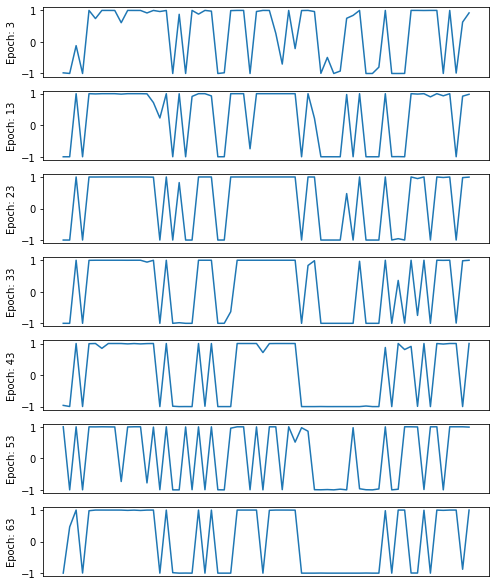

In [18]:
# EPOCHS = 64
EPOCHS = 64
BATCH = 5
 
NOISE = uniform(X_MIN, X_MAX, size = (SAMPLE_SIZE, SAMPLE_LEN))
ONES = np.ones((SAMPLE_SIZE))
ZEROS = np.zeros((SAMPLE_SIZE))
print("epoch | dis. loss | dis. acc | gen. loss | gen. acc")
print("------+-----------+----------+-----------+----------")
 
fig = plt.figure(figsize = (8, 12))
ax_index = 1
for e in range(EPOCHS):
    for k in range(SAMPLE_SIZE//BATCH):
        n = randint(0, SAMPLE_SIZE, size = BATCH)
        p = generator.predict(NOISE[n])
        x = np.concatenate((SAMPLE[n], p))
        y = np.concatenate((ONES[n], ZEROS[n]))
        d_result = discriminator.train_on_batch(x, y)
        discriminator.trainable = False
        g_result = gan.train_on_batch(NOISE[n], ONES[n])
        discriminator.trainable = True
    print(f" {e:04n} |  {d_result[0]:.5f}  |  {d_result[1]:.5f} |  {g_result[0]:.5f}  |  {d_result[1]:.5f}")
    # At 3, 13, 23, ... plots the last generator prediction
    if e % 10 == 3:
        ax = fig.add_subplot(8, 1, ax_index)
        plt.plot(X_COORDS, p[-1])
        ax.xaxis.set_visible(False)
        plt.ylabel(f"Epoch: {e}")
        ax_index += 1

In [16]:
### generate the output

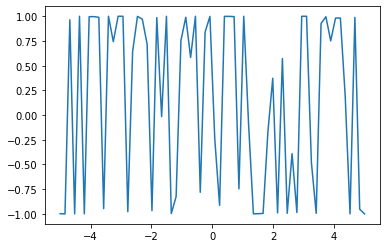

In [17]:
# Plots a curve generated by the GAN
y = generator.predict(uniform(X_MIN, X_MAX, size = (1, SAMPLE_LEN)))[0]
ax = fig.add_subplot(8, 1, ax_index)
plt.plot(X_COORDS, y)